# DSC RECRUITMENT TASK

## Finding if a person has a part time job or not
#### By Keith Joseph 

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
df = pd.read_csv("Student.csv")
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [227]:
df.tail()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High
4999,Christine Rodriguez,38,Male,1.627111,95,52,70,74,True,Low


# Data Preparation and Cleaning

In [228]:
df.shape

(5000, 10)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


In [230]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [231]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

len(numeric_df.columns)

6

### Finding missing values

In [232]:
df.isna().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

There is no `null` value

# Data Exploration

### Columns that we'll analyse

* Age
* Has_Part_Time_Job
* Hours_Studied
* IQ

#### Age

In [233]:
Ages = df.Age.unique()
len(Ages)

28

In [234]:
value = df.Age.value_counts()
value

19    200
18    198
23    198
38    196
30    194
27    192
34    192
35    191
39    187
22    186
45    183
42    180
32    178
20    177
37    177
41    175
43    175
44    174
40    173
28    172
25    172
36    165
21    165
24    163
33    162
29    162
31    157
26    156
Name: Age, dtype: int64

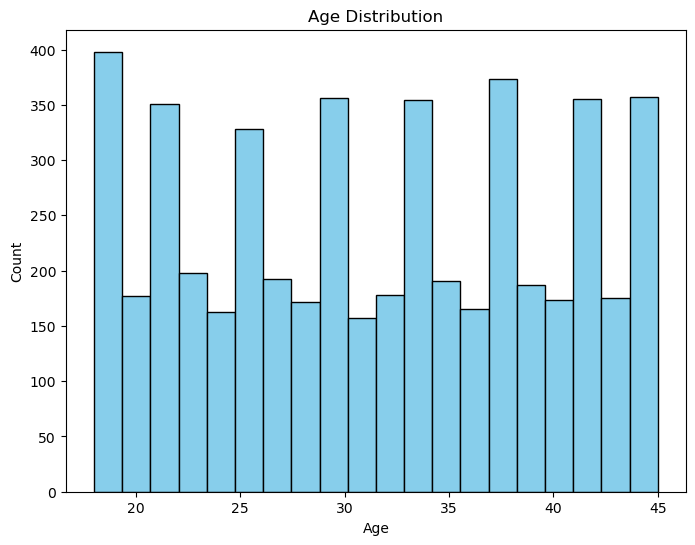

In [235]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [236]:
df.Age.isna().sum()

0

#### Has_Part_Time_Job

In [237]:
Job = df.Has_Part_Time_Job.unique()
Job

array([ True, False])

In [238]:
part_time = df.Has_Part_Time_Job.value_counts()
part_time

True     2525
False    2475
Name: Has_Part_Time_Job, dtype: int64

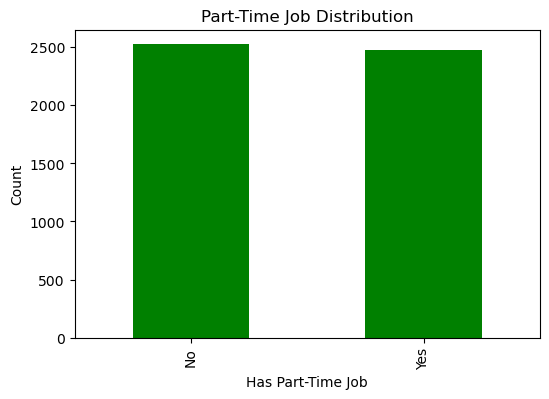

In [239]:
plt.figure(figsize=(6, 4))
part_time.plot(kind='bar', color='green')
plt.xlabel('Has Part-Time Job')
plt.ylabel('Count')
plt.title('Part-Time Job Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()




#### Hours_Studied

In [240]:
Hours = df.Hours_Studied.unique()
len(Hours)

5000

In [241]:
df.Hours_Studied.unique()

array([8.14082056, 9.82562647, 8.8353719 , ..., 4.15676969, 6.78854842,
       1.62711148])

In [242]:
study_hours = data['Study_Hours_Group'].value_counts()
print(study_hours)

High    2763
Low     2237
Name: Study_Hours_Group, dtype: int64


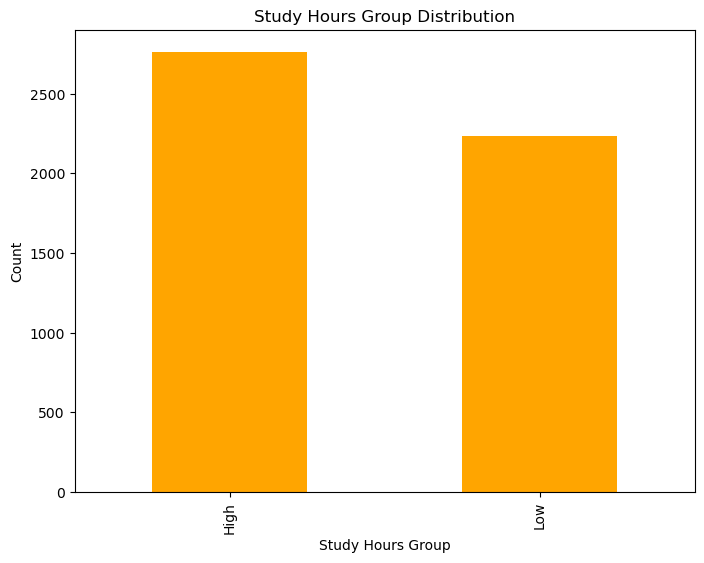

In [243]:
plt.figure(figsize=(8, 6))
study_hours.plot(kind='bar', color='orange')
plt.xlabel('Study Hours Group')
plt.ylabel('Count')
plt.title('Study Hours Group Distribution')
plt.show()

#### IQ

In [244]:
IQ = df.IQ.unique()
len(IQ)

71

In [245]:
df.IQ.value_counts()

121    91
87     89
90     88
91     87
143    84
       ..
148    61
139    61
147    60
101    58
85     51
Name: IQ, Length: 71, dtype: int64

#### Gender

In [246]:
Gender= data['Gender'].value_counts()
print(Gender)

Female    2523
Male      2477
Name: Gender, dtype: int64


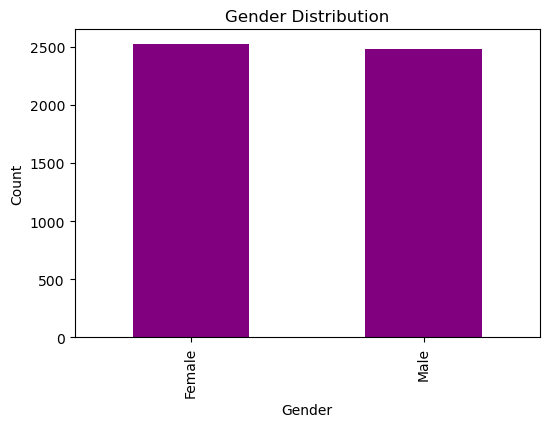

In [247]:
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='purple')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

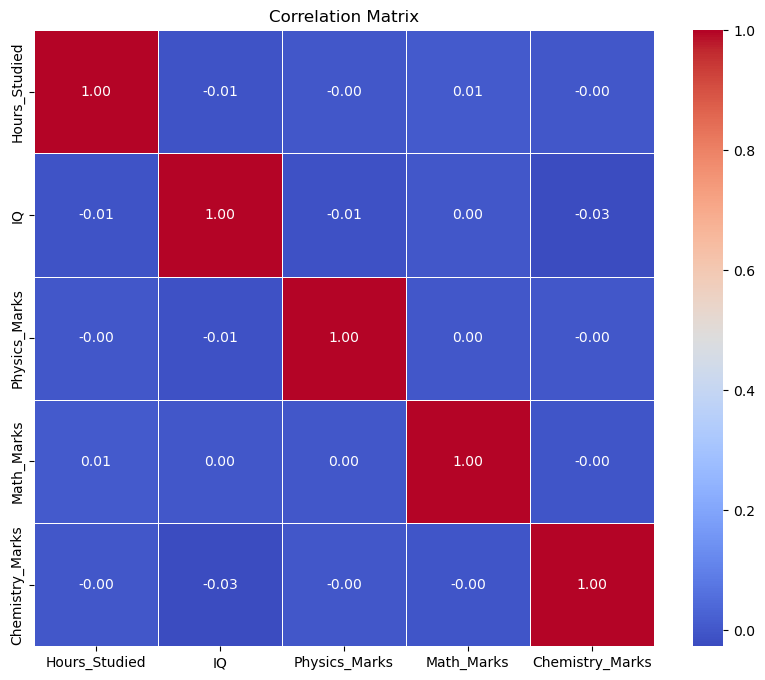

In [248]:
correlation_matrix = data[['Hours_Studied', 'IQ', 'Physics_Marks', 'Math_Marks', 'Chemistry_Marks']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


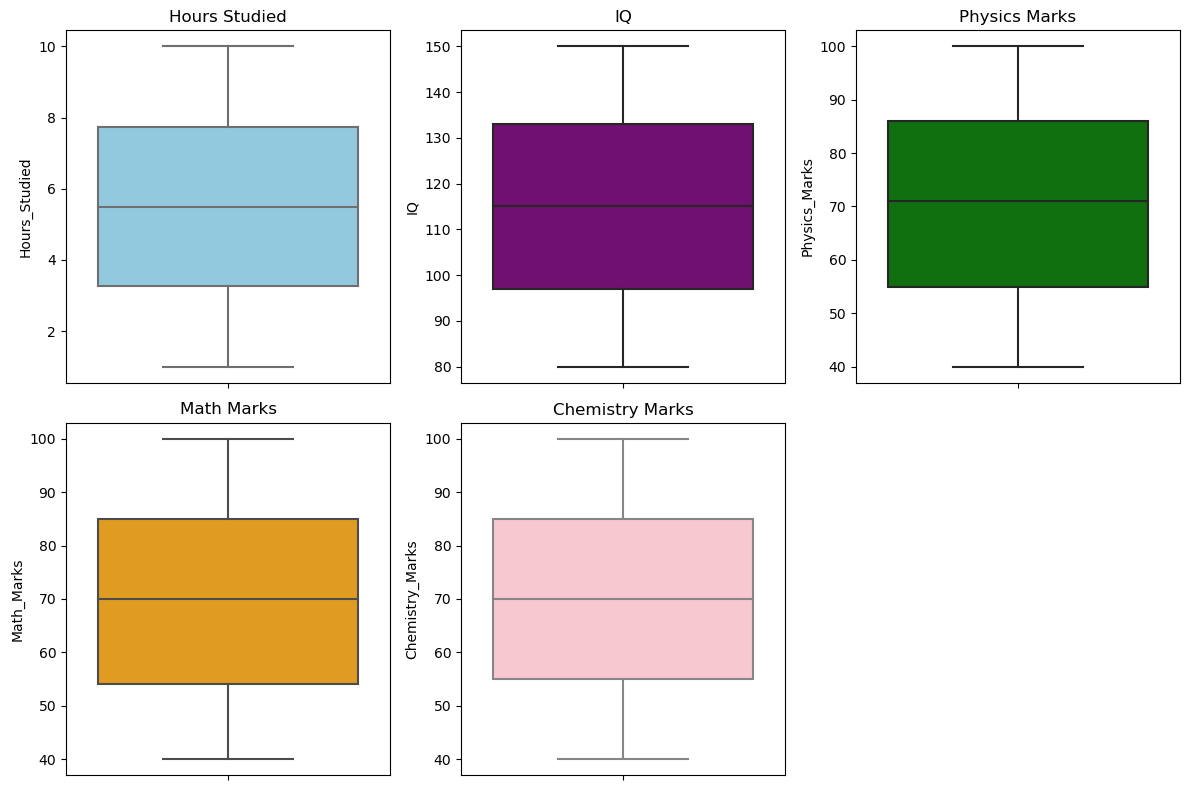

In [249]:
# Finding Outliers in numeric data columns
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(y=data['Hours_Studied'], color='skyblue')
plt.title('Hours Studied')

plt.subplot(2, 3, 2)
sns.boxplot(y=data['IQ'], color='purple')
plt.title('IQ')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['Physics_Marks'], color='green')
plt.title('Physics Marks')

plt.subplot(2, 3, 4)
sns.boxplot(y=data['Math_Marks'], color='orange')
plt.title('Math Marks')

plt.subplot(2, 3, 5)
sns.boxplot(y=data['Chemistry_Marks'], color='pink')
plt.title('Chemistry Marks')

plt.tight_layout()
plt.show()

# Data Preprocessing & Model

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [250]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [251]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Study_Hours_Group'] = df['Study_Hours_Group'].map({'High': 1, 'Low': 0})

In [252]:
df['Has_Part_Time_Job'] = df['Has_Part_Time_Job'].astype(int)

In [253]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,1,8.140821,92,87,43,85,1,1
1,Sandra Wiggins,35,0,9.825626,112,86,81,54,0,1
2,Julia Olsen,33,1,8.835372,131,87,52,57,1,1
3,Robert Pennington,33,1,2.482483,138,70,86,83,0,0
4,Kayla Sellers,28,0,4.419793,90,95,48,83,1,0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   int64  
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   int64  
 9   Study_Hours_Group  5000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 390.8+ KB


In [256]:
X = df.drop(columns=['Name','Has_Part_Time_Job'], axis=1)
y = df['Has_Part_Time_Job']

In [257]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42) 

In [258]:
X_test.head()

,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Study_Hours_Group
1501,37,1,6.043157,88,94,71,75,1
2586,24,1,7.382802,144,66,43,89,1
2653,43,1,4.423837,80,49,78,68,0
1055,32,0,1.521753,84,46,86,43,0
705,19,1,6.224565,129,79,60,75,1


In [259]:
# Initialize and train each model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Support Vector Machine (SVM)": SVC()
}

In [260]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    results.append(result)



In [263]:
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print()

Model: Logistic Regression
Accuracy: 0.50
Precision: 0.50
Recall: 0.67
F1 Score: 0.57
Confusion Matrix:
[[170 336]
 [163 331]]

Model: Random Forest Classifier
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
Confusion Matrix:
[[252 254]
 [262 232]]

Model: Gradient Boosting Classifier
Accuracy: 0.48
Precision: 0.48
Recall: 0.55
F1 Score: 0.51
Confusion Matrix:
[[209 297]
 [222 272]]

Model: Support Vector Machine (SVM)
Accuracy: 0.48
Precision: 0.48
Recall: 0.78
F1 Score: 0.60
Confusion Matrix:
[[ 92 414]
 [108 386]]



In [268]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {result['Accuracy']:.2f}")
print(f"Precision: {result['Precision']:.2f}")

Accuracy: 0.48
Precision: 0.48


In [269]:
pickle.dump(model, open('model.pkl','wb'))